# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading Data and View

In [3]:
df_real = pd.read_csv("BAFL_Loan_Data.csv")
df = df_real
df.head()

,Customer ID,Sex,Demography,Marital Status,Education Level,Business Owner,No. of Dependents,Applicant Income,Co-Applicant Income,Loan Amount,Loan Term (Years),Credit History,Loan Status
0,1,Male,Urban,No,Graduate,No,0,"500,000","130,000",NaN,30.0,1.0,Y
1,2,Male,Rural,Yes,Graduate,No,1,"380,000","140,000","2,300,000",30.0,1.0,N
2,3,Male,Urban,Yes,Graduate,Yes,0,"240,000","60,000","5,000,000",30.0,1.0,Y
3,4,Male,Urban,Yes,Intermediate,No,0,"340,000","50,000","3,850,000",30.0,1.0,Y
4,5,Male,Urban,No,Graduate,No,0,"340,000","60,000","2,830,000",30.0,1.0,Y


In [5]:
df.describe()

,Customer ID,Loan Term (Years),Credit History
count,600.000000,586.000000,551.000000
mean,300.500000,28.540956,0.840290
std,173.349358,5.401411,0.366669
min,1.000000,1.000000,0.000000
25%,150.750000,30.000000,1.000000
50%,300.500000,30.000000,1.000000
75%,450.250000,30.000000,1.000000
max,600.000000,40.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          600 non-null    int64  
 1   Sex                  587 non-null    object 
 2   Demography           600 non-null    object 
 3   Marital Status       597 non-null    object 
 4   Education Level      600 non-null    object 
 5   Business Owner       570 non-null    object 
 6   No. of Dependents    585 non-null    object 
 7   Applicant Income     600 non-null    object 
 8   Co-Applicant Income  600 non-null    object 
 9   Loan Amount          579 non-null    object 
 10  Loan Term (Years)    586 non-null    float64
 11  Credit History       551 non-null    float64
 12  Loan Status          600 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 61.1+ KB


# Preprocessing the dataset

In [9]:
df.isnull().sum()

Customer ID             0
Sex                    13
Demography              0
Marital Status          3
Education Level         0
Business Owner         30
No. of Dependents      15
Applicant Income        0
Co-Applicant Income     0
Loan Amount            21
Loan Term (Years)      14
Credit History         49
Loan Status             0
dtype: int64

In [11]:
# Remove comma and convert into float.
df['Applicant Income'] = df['Applicant Income'].replace({',': ''}, regex=True).astype(float)
df['Co-Applicant Income'] = df['Co-Applicant Income'].replace({',': ''}, regex=True).astype(float)
df['Loan Amount'] = df['Loan Amount'].replace({',': ''}, regex=True).astype(float)

In [13]:
# convert No. of Dependents into float

df['No. of Dependents'] = pd.to_numeric(df['No. of Dependents'], errors='coerce')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          600 non-null    int64  
 1   Sex                  587 non-null    object 
 2   Demography           600 non-null    object 
 3   Marital Status       597 non-null    object 
 4   Education Level      600 non-null    object 
 5   Business Owner       570 non-null    object 
 6   No. of Dependents    537 non-null    float64
 7   Applicant Income     600 non-null    float64
 8   Co-Applicant Income  600 non-null    float64
 9   Loan Amount          579 non-null    float64
 10  Loan Term (Years)    586 non-null    float64
 11  Credit History       551 non-null    float64
 12  Loan Status          600 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 61.1+ KB


In [15]:
# Fill NaN values for the following columns with their respective means
columns_to_fill = ['Applicant Income', 'Co-Applicant Income', 'Loan Amount', 'No. of Dependents','Loan Term (Years)','Credit History']

for column in columns_to_fill:
    mean_value = df[column].mean()  # Calculate the mean of the column
    df[column] = df[column].fillna(mean_value)  # Fill NaN values with the mean

df.isnull().sum()

Customer ID             0
Sex                    13
Demography              0
Marital Status          3
Education Level         0
Business Owner         30
No. of Dependents       0
Applicant Income        0
Co-Applicant Income     0
Loan Amount             0
Loan Term (Years)       0
Credit History          0
Loan Status             0
dtype: int64

In [21]:
# fill the missing values for categorical terms - mode
df['Sex'] = df["Sex"].fillna(df['Sex'].mode()[0])
df['Business Owner'] = df["Business Owner"].fillna(df['Business Owner'].mode()[0])
df['Marital Status'] = df["Marital Status"].fillna(df['Marital Status'].mode()[0])
df.isna().sum()

Customer ID            0
Sex                    0
Demography             0
Marital Status         0
Education Level        0
Business Owner         0
No. of Dependents      0
Applicant Income       0
Co-Applicant Income    0
Loan Amount            0
Loan Term (Years)      0
Credit History         0
Loan Status            0
dtype: int64

# EDA

<Axes: xlabel='count', ylabel='Sex'>

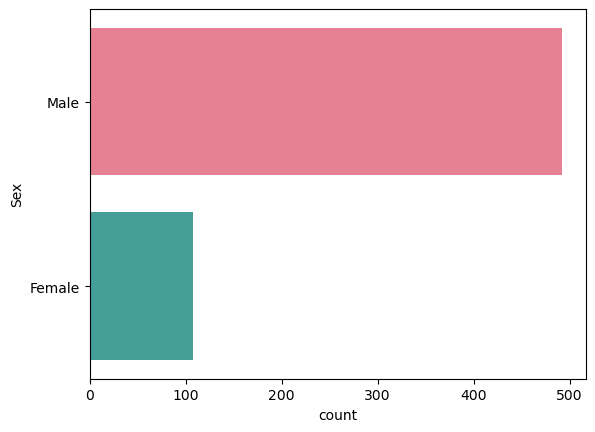

In [46]:
# categorical attributes visualization
sns.countplot(df['Sex'],palette='husl')

<Axes: xlabel='count', ylabel='Marital Status'>

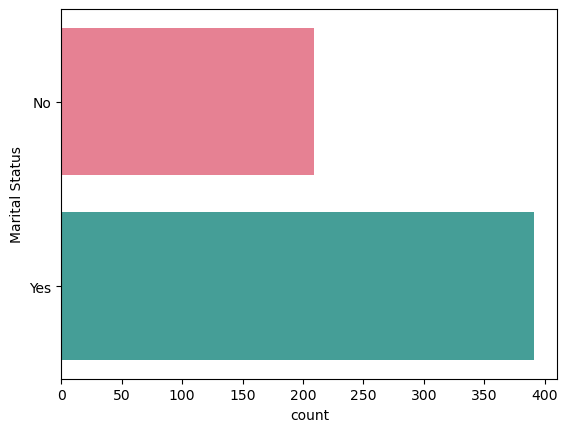

In [32]:
sns.countplot(df['Marital Status'],palette='husl')

In [40]:
df['No. of Dependents'] = df['No. of Dependents'].round().astype(int)

<Axes: xlabel='No. of Dependents', ylabel='count'>

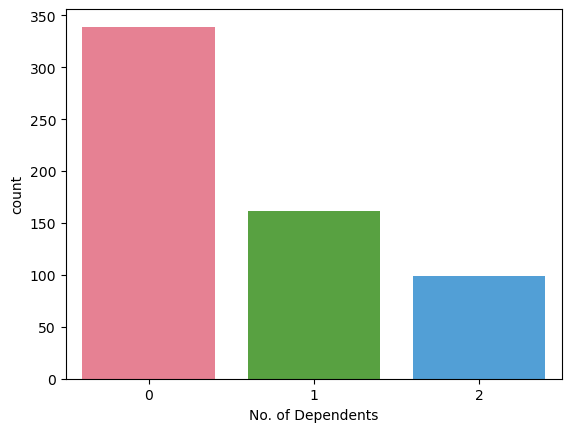

In [44]:
sns.countplot(x=df['No. of Dependents'], palette='husl')

<Axes: xlabel='count', ylabel='Education Level'>

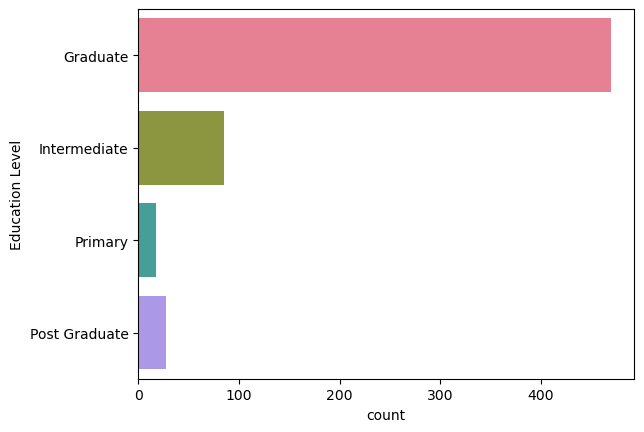

In [48]:
sns.countplot(df['Education Level'], palette='husl')

<Axes: xlabel='count', ylabel='Business Owner'>

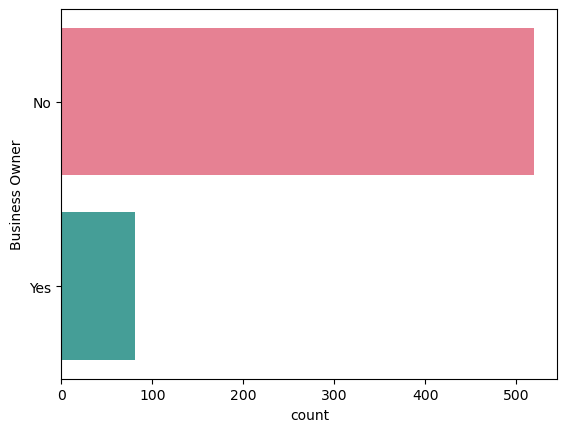

In [50]:
sns.countplot(df['Business Owner'], palette='husl')

<Axes: xlabel='count', ylabel='Demography'>

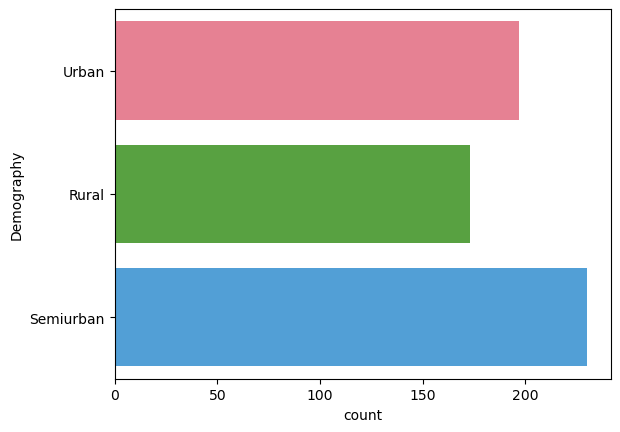

In [52]:
sns.countplot(df['Demography'], palette='husl')

<Axes: xlabel='count', ylabel='Loan Status'>

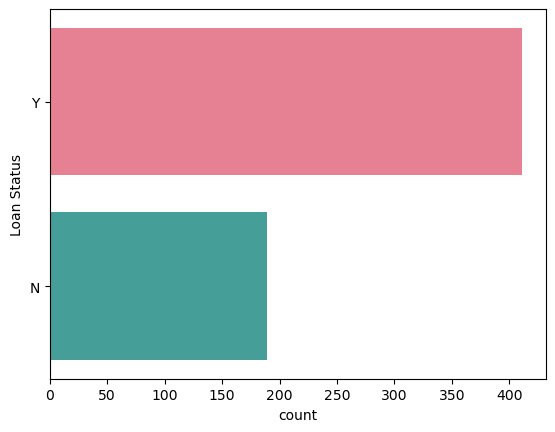

In [54]:
sns.countplot(df['Loan Status'], palette='husl')

<Axes: xlabel='Applicant Income', ylabel='Density'>

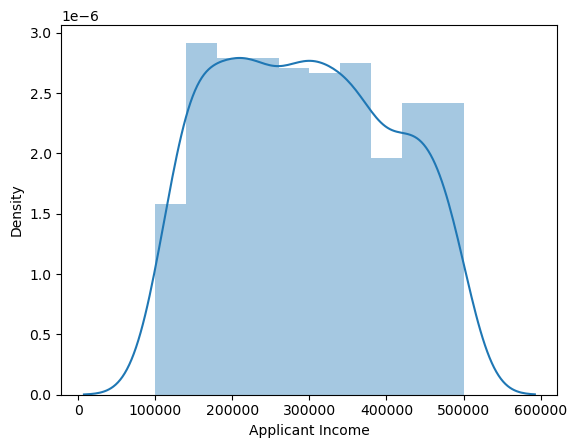

In [62]:
# numerical attributes visualization
sns.distplot(df["Applicant Income"])

<Axes: xlabel='Co-Applicant Income', ylabel='Density'>

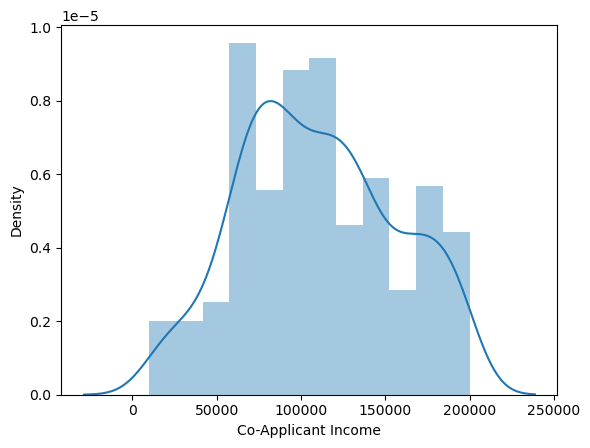

In [64]:
sns.distplot(df["Co-Applicant Income"])

<Axes: xlabel='Loan Amount', ylabel='Density'>

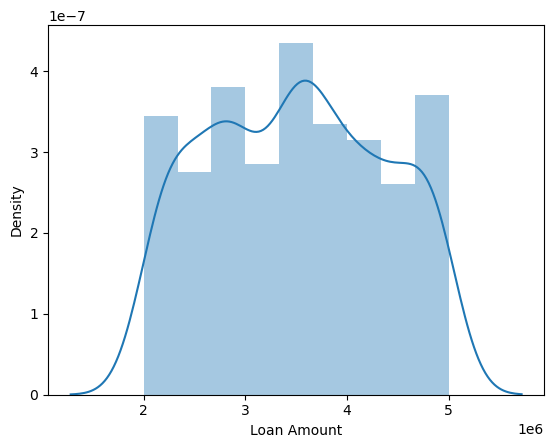

In [66]:
sns.distplot(df["Loan Amount"])

<Axes: xlabel='Loan Term (Years)', ylabel='Density'>

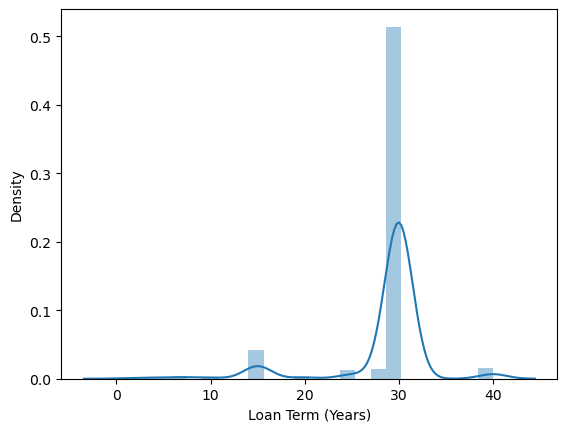

In [68]:
sns.distplot(df["Loan Term (Years)"])

<Axes: xlabel='Credit History', ylabel='Density'>

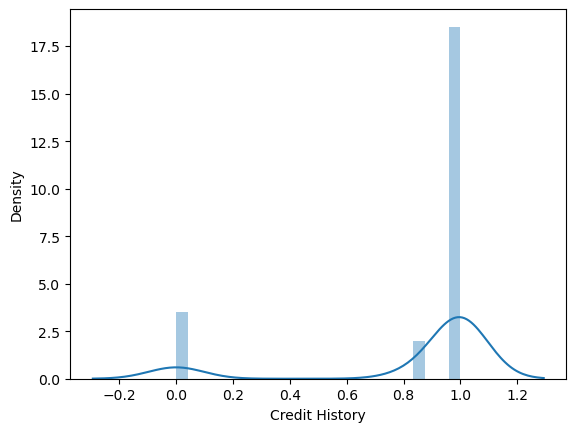

In [70]:
sns.distplot(df["Credit History"])

# Creation of new attributes

In [73]:
df['Total_Income'] = df['Applicant Income'] + df['Co-Applicant Income']
df.head()

,Customer ID,Sex,Demography,Marital Status,Education Level,Business Owner,No. of Dependents,Applicant Income,Co-Applicant Income,Loan Amount,Loan Term (Years),Credit History,Loan Status,Total_Income
0,1,Male,Urban,No,Graduate,No,0,500000.0,130000.0,3.498618e+06,30.0,1.0,Y,630000.0
1,2,Male,Rural,Yes,Graduate,No,1,380000.0,140000.0,2.300000e+06,30.0,1.0,N,520000.0
2,3,Male,Urban,Yes,Graduate,Yes,0,240000.0,60000.0,5.000000e+06,30.0,1.0,Y,300000.0
3,4,Male,Urban,Yes,Intermediate,No,0,340000.0,50000.0,3.850000e+06,30.0,1.0,Y,390000.0
4,5,Male,Urban,No,Graduate,No,0,340000.0,60000.0,2.830000e+06,30.0,1.0,Y,400000.0


# Log Transformation

<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

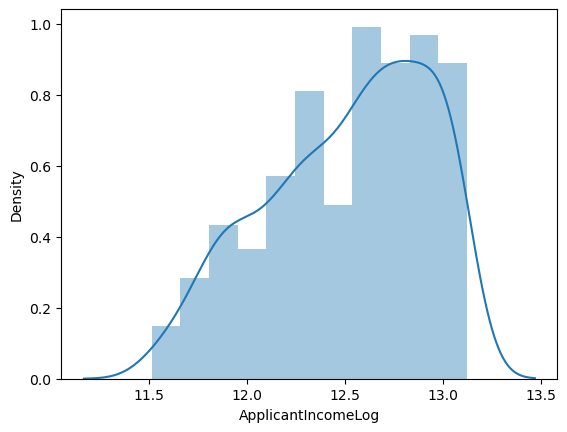

In [76]:
# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['Applicant Income']+1)
sns.distplot(df["ApplicantIncomeLog"])

<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

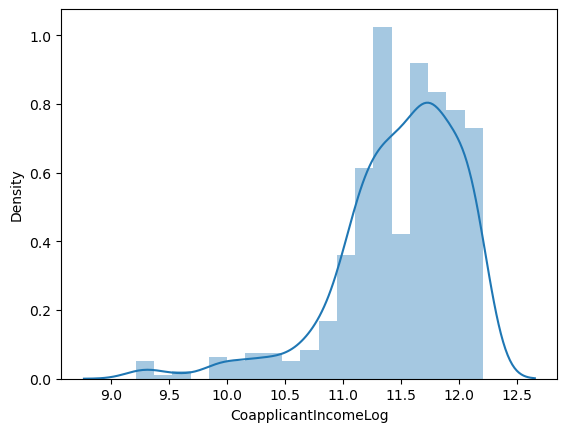

In [78]:
df['CoapplicantIncomeLog'] = np.log(df['Co-Applicant Income']+1)
sns.distplot(df["CoapplicantIncomeLog"])

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

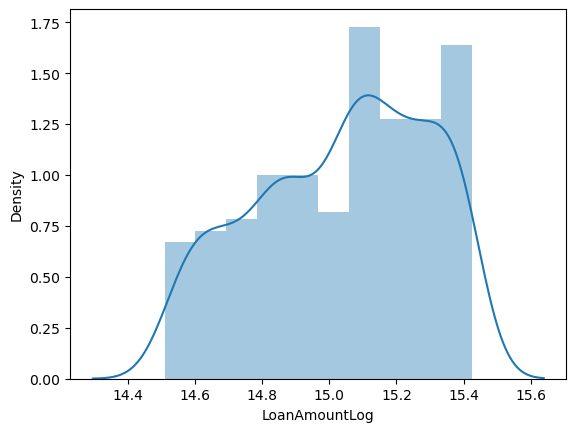

In [80]:
df['LoanAmountLog'] = np.log(df['Loan Amount']+1)
sns.distplot(df["LoanAmountLog"])

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

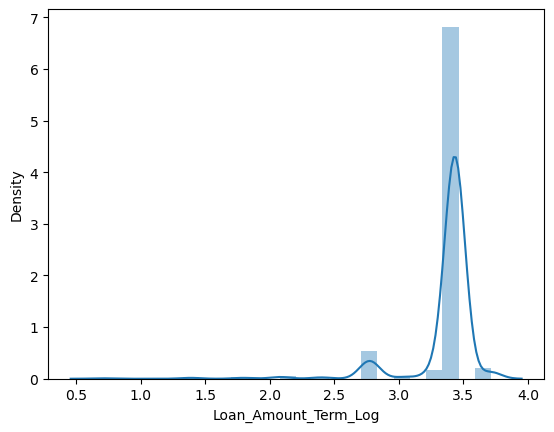

In [82]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan Term (Years)']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

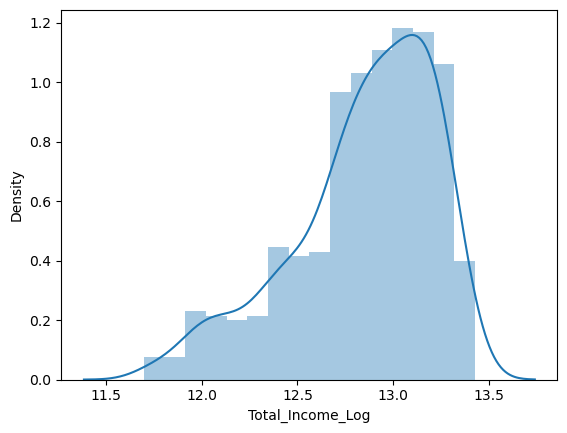

In [84]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"])

# Coorelation Matrix

In [93]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

<Axes: >

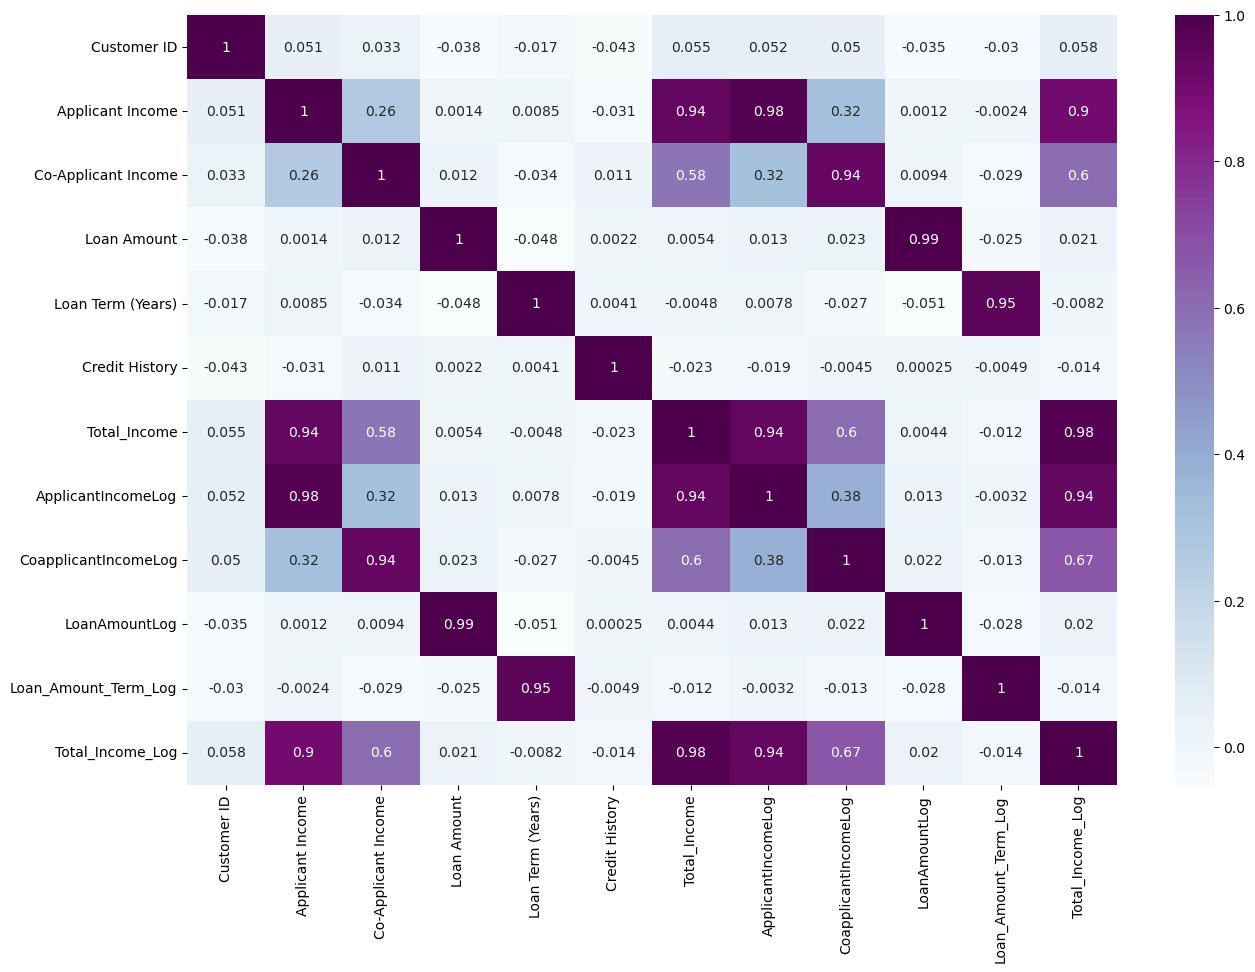

In [97]:
corr = df_numeric.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [99]:
df_numeric.head()

,Customer ID,Applicant Income,Co-Applicant Income,Loan Amount,Loan Term (Years),Credit History,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,500000.0,130000.0,3.498618e+06,30.0,1.0,630000.0,13.122365,11.775297,15.067879,3.433987,13.353477
1,2,380000.0,140000.0,2.300000e+06,30.0,1.0,520000.0,12.847929,11.849405,14.648420,3.433987,13.161586
2,3,240000.0,60000.0,5.000000e+06,30.0,1.0,300000.0,12.388398,11.002117,15.424949,3.433987,12.611541
3,4,340000.0,50000.0,3.850000e+06,30.0,1.0,390000.0,12.736704,10.819798,15.163584,3.433987,12.873905
4,5,340000.0,60000.0,2.830000e+06,30.0,1.0,400000.0,12.736704,11.002117,14.855788,3.433987,12.899222


In [105]:
# drop unnecessary columns
cols = ['Applicant Income', 'Co-Applicant Income', "Loan Amount", "Loan Term (Years)", "Total_Income", 'Customer ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)

In [107]:
df.head()

,Sex,Demography,Marital Status,Education Level,Business Owner,No. of Dependents,Credit History,Loan Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,Urban,No,Graduate,No,0,1.0,Y,13.122365,15.067879,3.433987,13.353477
1,Male,Rural,Yes,Graduate,No,1,1.0,N,12.847929,14.648420,3.433987,13.161586
2,Male,Urban,Yes,Graduate,Yes,0,1.0,Y,12.388398,15.424949,3.433987,12.611541
3,Male,Urban,Yes,Intermediate,No,0,1.0,Y,12.736704,15.163584,3.433987,12.873905
4,Male,Urban,No,Graduate,No,0,1.0,Y,12.736704,14.855788,3.433987,12.899222


# Label Encoding

In [112]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex',"Marital Status","Education Level",'Business Owner',"Demography","Loan Status","No. of Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [114]:
df.head()

,Sex,Demography,Marital Status,Education Level,Business Owner,No. of Dependents,Credit History,Loan Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,2,0,0,0,0,1.0,1,13.122365,15.067879,3.433987,13.353477
1,1,0,1,0,0,1,1.0,0,12.847929,14.648420,3.433987,13.161586
2,1,2,1,0,1,0,1.0,1,12.388398,15.424949,3.433987,12.611541
3,1,2,1,1,0,0,1.0,1,12.736704,15.163584,3.433987,12.873905
4,1,2,0,0,0,0,1.0,1,12.736704,14.855788,3.433987,12.899222


# Train-Test Split

In [117]:
# specify input and output attributes
X = df.drop(columns=['Loan Status'], axis=1)
y = df['Loan Status']

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Training

In [124]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [126]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 75.33333333333333
Cross validation is 80.83333333333333


In [128]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 66.66666666666666
Cross validation is 63.5


In [130]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 72.0
Cross validation is 78.16666666666666


In [132]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 70.0
Cross validation is 77.16666666666666


# Hyperparameter tuning

In [135]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 76.0
Cross validation is 80.16666666666667


# Confusion Matrix

In [138]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [140]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[17, 34],
       [ 5, 94]], dtype=int64)

<Axes: >

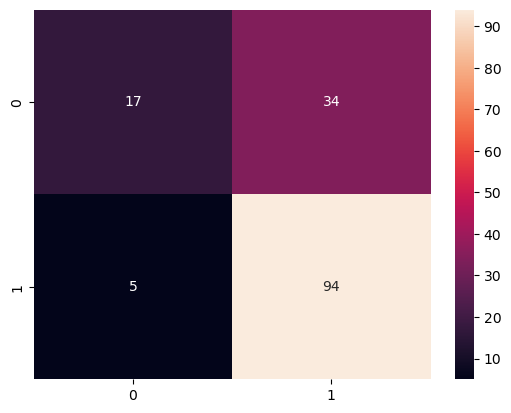

In [142]:
sns.heatmap(cm, annot=True)